<a href="https://colab.research.google.com/github/vivek-231/homework/blob/main/newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
import pandas as pd
from google.colab import files
uploaded  = files.upload()
file_name = list(uploaded.keys())[0]
newspaper = pd.read_csv(file_name)


Saving NewspaperData (1).csv to NewspaperData (1) (1).csv


In [4]:
newspaper.shape

(34, 3)

In [7]:
newspaper.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-12-e303d1e28799>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newspaper['daily'])


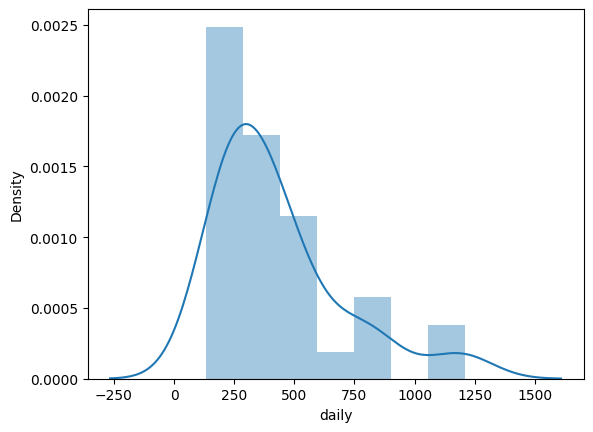

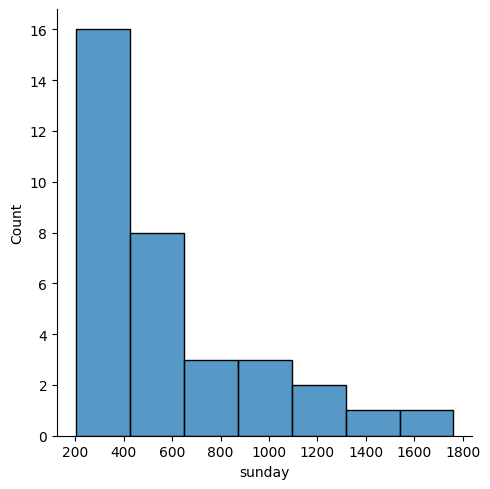

In [12]:
import seaborn as sns
sns.distplot(newspaper['daily'])
sns.displot(newspaper['sunday'])

In [13]:
newspaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [23]:
import statsmodels.formula.api as smf
model = smf.ols('daily~sunday',data=newspaper).fit()

In [29]:
model.params

,0
Intercept,25.832125
sunday,0.685265


In [24]:
print(model.tvalues,'\n\n',model.pvalues)

Intercept     1.022773
sunday       18.934840
dtype: float64 

 Intercept    3.140853e-01
sunday       6.016802e-19
dtype: float64


In [27]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [49]:
newdata=pd.DataFrame({'sunday':[500,700]})

In [50]:
data_pred=newdata

In [51]:
model.predict(data_pred)

,0
0,368.464646
1,505.517654


In [35]:
def get_standard_values(vals):
  return(vals-vals.mean())/vals.std()

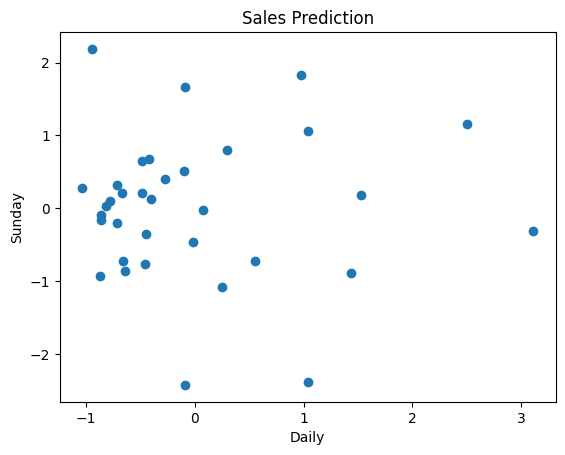

In [45]:
plt.scatter(get_standard_values(model.fittedvalues),get_standard_values(model.resid))
plt.title('Sales Prediction')
plt.xlabel('Daily')
plt.ylabel('Sunday')
plt.show()

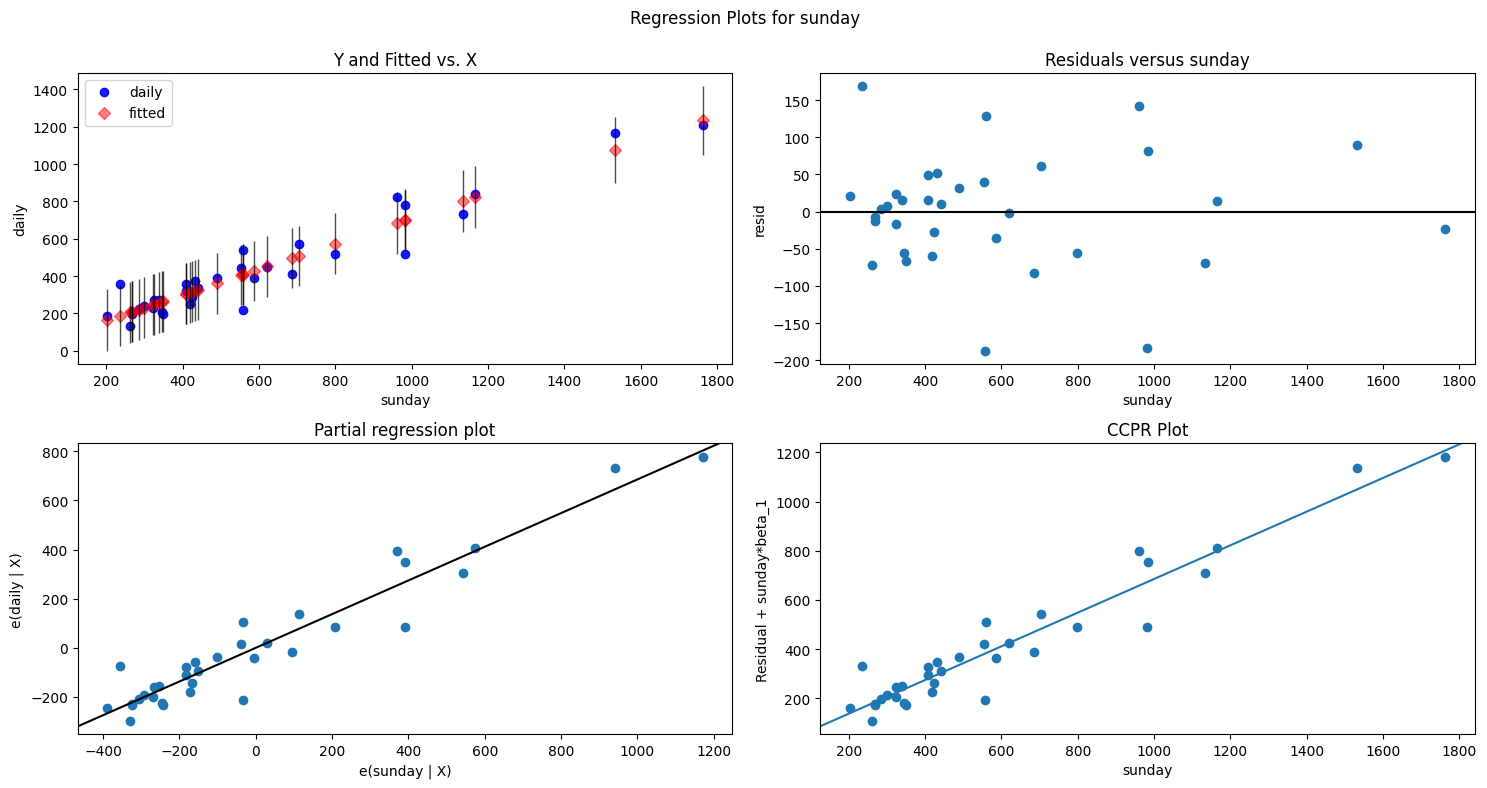

In [37]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sunday', fig=fig)
plt.show()

In [52]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

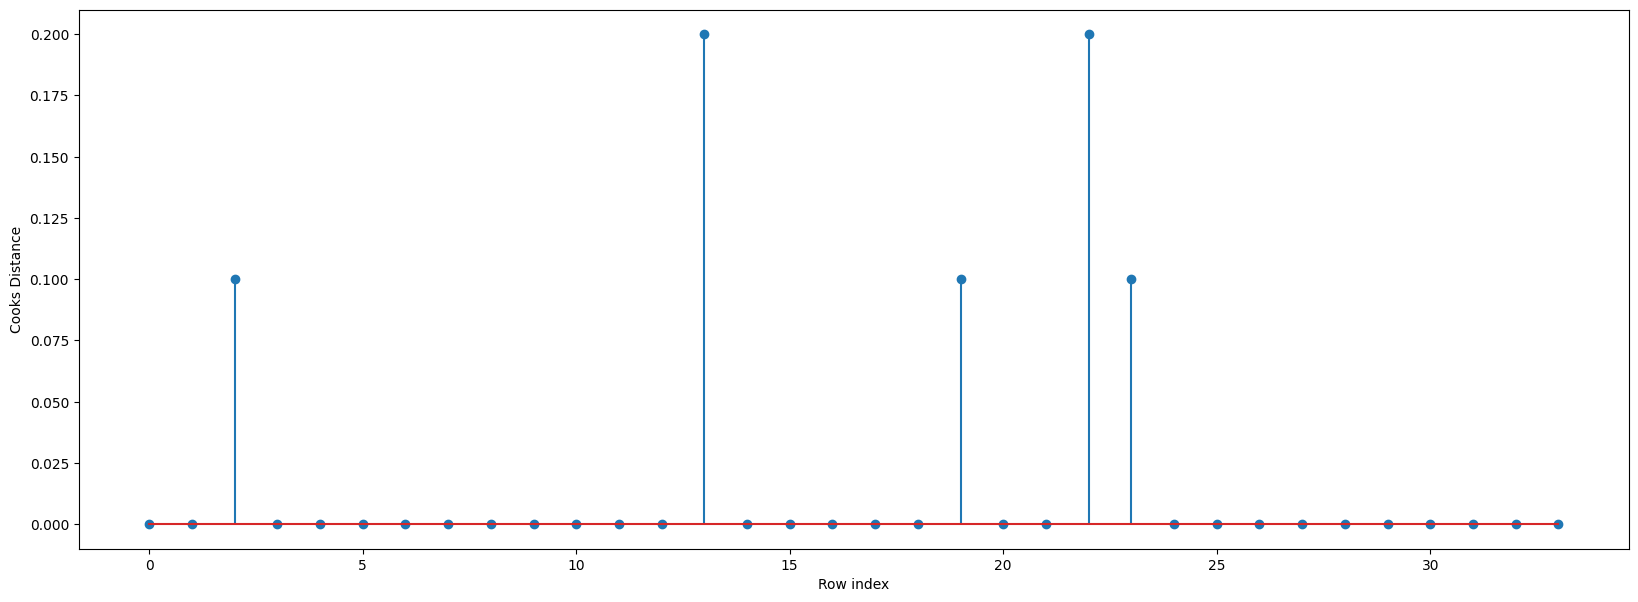

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(newspaper)), np.round(c, 1))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
newdata=pd.DataFrame({'sunday':[500,700]})

In [56]:
model.predict(newdata)
model.predict(newspaper.iloc[0:5,])
pred_y=model.predict(newspaper)

In [57]:
model.predict(newspaper.iloc[0:7,])

,0
0,360.588210
1,572.877838
2,186.926972
3,231.035427
4,408.959013
5,802.408049
6,264.814197
